In [1]:
# Notebook 5 - Graphing one month and finding maxima

In [2]:
import pandas as pd     
import numpy as np
import requests 
import matplotlib.pyplot as plt

In [3]:
# Need to look at a smaller time frame to get my head around this! 
# Just consider February 2024

In [4]:
# importing the file and checking dateTime is a date time Dtype.  
# Shrinking the df down to minimal fields
df2 = pd.read_csv("data/df-2024-02.csv") 
df2["dateTime"] = pd.to_datetime(df2["dateTime"], 
                                 format='%Y-%m-%d %H:%M:%S')
df2 = df2[["dateTime", "date", "label", "stationReference", 
           "value"]]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          4803 non-null   datetime64[ns]
 1   date              4803 non-null   object        
 2   label             4803 non-null   object        
 3   stationReference  4803 non-null   int64         
 4   value             4803 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 187.7+ KB


In [5]:
# just getting the Yeoford data out

mask_for_yeoford = df2["stationReference"] == 45137
df_yeo_feb = df2[mask_for_yeoford]
df_yeo_feb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1489 entries, 3314 to 4802
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          1489 non-null   datetime64[ns]
 1   date              1489 non-null   object        
 2   label             1489 non-null   object        
 3   stationReference  1489 non-null   int64         
 4   value             1489 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 69.8+ KB


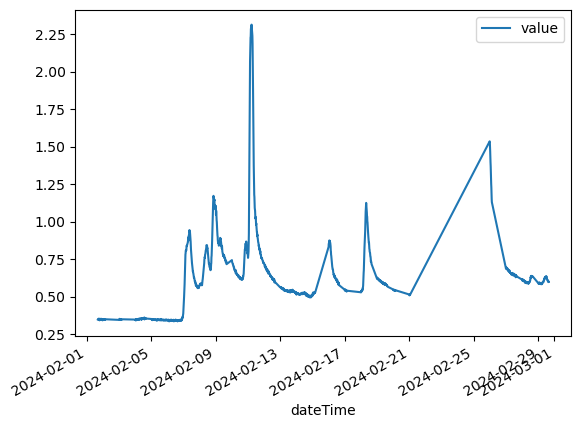

In [6]:
# setting up a date time range for the entirity of February from 
# midnight at the start of 1st to fifteen minutes before midnight
# on 29th. 
all_times_index = pd.date_range("2024-02-01 00:00:00", 
                                "2024-02-29 23:45:00", freq="15min")
all_times = all_times_index.to_frame(index = False, 
                                     name = "all_times")

# merging the yeoford data into this new dataframe
all_time_feb_yeo = all_times.merge(df_yeo_feb, how = "left", 
                                   left_on = "all_times", 
                                   right_on = "dateTime")

# graphing the df
all_time_feb_yeo["value"] = all_time_feb_yeo["value"].astype(float) 
all_time_feb_yeo.plot(y="value", x="dateTime", kind='line');



In [7]:
################################################
# Finding maxima.
################################################
# function logic in English
# for all the datapoints of one site in dateTime order
# variables:
# counter = 1     # ask it to do counter -1 to find a, and counter +1 to find c
# a = 0           # river value of row before
# b = 0           # river value of row
# c = 0           # river value of row after
# df_maxima = []  # where I collect my maxima
#
# take the next 3 values of "value" in your dataframe, call them a, b & c
#
# if a < b and b > c # then I have b as a maxima and I want to record the date time details of b 
#
# some sort of exception if either a or c is missing data and therefore it isn't a true maxima, just a data gap
# some sort of exception if it is just a blip maybe taking an average of the 20 points either side of b?
#
## what happens if the peak has two equal values so b = c, (but d which hasn't been captured is less)... need to modify logic
#
# then save all the b data to a new dataframe called df_maxima
# move on one place, and loop

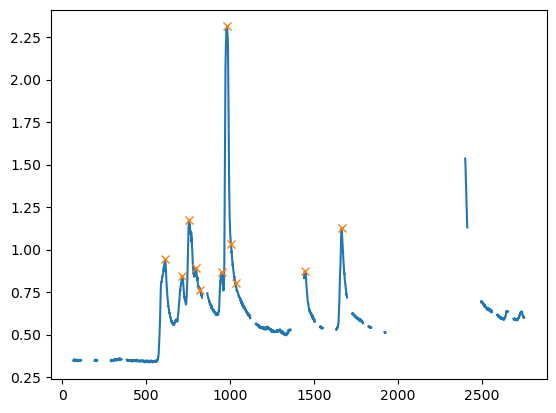

In [8]:
# someone must have already solved this!  Pilfering code... to try 
# to see what others have done.

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
x = all_time_feb_yeo["value"]
peaks, _ = find_peaks(x, height=0.75, distance = 25)   

# height limits so I am only interested in maxima above a certain 
# height, if I can identify field filling height this would be 
# useful!  For now randomly set to ignore low level noise

plt.plot(x)
plt.plot(peaks, x[peaks], "x")

plt.show()

# OK, maxima is too general, because small fluctuations are showing
# as peaks... that is a challenge I'd not thought of.  
# Does this matter?  If the purpose of finding maxima is to compare
# maxima.  Note x axis in this graph is not right...

In [9]:
# there is one clear maxima here.  Let me simply consider this one 
# across all three sites


mask_for_yeoford_max = df_yeo_feb["value"] == df_yeo_feb["value"].max()
print(df_yeo_feb[mask_for_yeoford_max])

# This gives me the maxima for Yeoford

                dateTime        date    label  stationReference  value
4008 2024-02-11 05:15:00  2024-02-11  Yeoford             45137  2.312


In [10]:
# Doing the same for Upton Hellions and Cowley Bridge

mask_for_upton = df2["stationReference"] == 45136
df_up_feb = df2[mask_for_upton]
mask_for_upton_max = df_up_feb["value"] == df_up_feb["value"].max()
print(df_up_feb[mask_for_upton_max])

mask_for_cowley = df2["stationReference"] == 45117
df_cow_feb = df2[mask_for_cowley]
mask_for_cowley_max = df_cow_feb["value"] == df_cow_feb["value"].max()
print(df_cow_feb[mask_for_cowley_max])


# That is annoying, I was hoping, seing as it was such a strong 
# signature in Yeoford that it would also be the key 
# feature in Upton, but obviously this event was only a key feature
# in one catchment.  Still I can clearly see the delay between 
# Yeoford and Cowley Bridge 

                dateTime        date           label  stationReference  value
2996 2024-02-18 09:00:00  2024-02-18  Upton Hellions             45136  2.306
               dateTime        date          label  stationReference  value
791 2024-02-11 09:15:00  2024-02-11  Cowley Bridge             45117  2.258


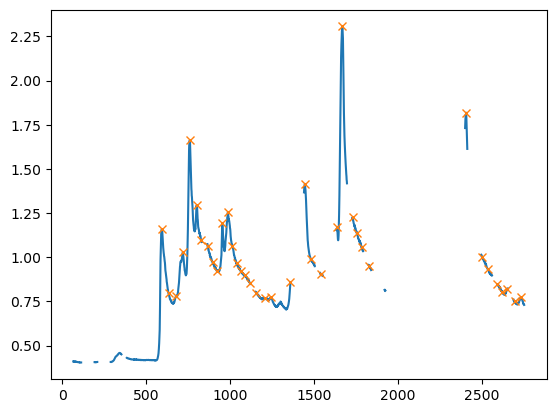

In [11]:
# Visually looking at Upton Hellions, notably different peak 
# magnitudes to Yeoford
all_times_index = pd.date_range("2024-02-01 00:00:00", 
                                "2024-02-29 23:45:00", freq="15min")
all_times = all_times_index.to_frame(index = False, 
                                     name = "all_times")

# merging the yeoford data into this new dataframe
all_time_feb_up = all_times.merge(df_up_feb, how = "left", 
                                  left_on = "all_times", 
                                  right_on = "dateTime")

# graphing the df
x = all_time_feb_up["value"]
peaks, _ = find_peaks(x, height=0.75, distance = 25)   

# height limits so I am only interested in maxima above a certain 
# height, if I can identify field filling height this would be 
# useful!  For now randomly set to ignore low level noise
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

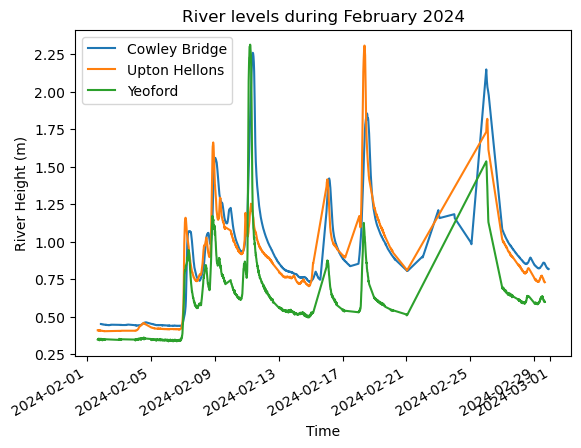

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
all_time_feb_cow = all_times.merge(df_cow_feb, how = "left", 
                                   left_on = "all_times", 
                                   right_on = "dateTime")
all_time_feb_cow["value"] = all_time_feb_cow["value"].astype(float) 
all_time_feb_cow.plot(ax=ax, y="value", x="dateTime", kind='line',
                     ylabel="River Height (m)",
                     title="River levels during February 2024");

all_time_feb_up["value"] = all_time_feb_up["value"].astype(float) 
all_time_feb_up.plot(ax=ax, y="value", x="dateTime", kind='line');

all_time_feb_yeo["value"] = all_time_feb_yeo["value"].astype(float) 
all_time_feb_yeo.plot(ax=ax, y="value", x="dateTime", kind='line')
ax.legend(["Cowley Bridge", "Upton Hellons", "Yeoford"]);
ax.set_xlabel("Time");

In [13]:
# This is the detail you simply can't see when looking at a year.  
# Peaks seem to seldom be as significant in both catchments for 
# the same event

In [14]:
# I guess I need to zone in on specific dates and look to see if 
# the lag is consistent

In [15]:
# Masking for 11th

single_date_2023_02_11 = df2[df2["date"] == "2024-02-11"]

mask_for_yeoford = single_date_2023_02_11["stationReference"] == 45137
df_yeo_feb = single_date_2023_02_11[mask_for_yeoford]
mask_for_yeoford_max = df_yeo_feb["value"] == df_yeo_feb["value"].max()
print(df_yeo_feb[mask_for_yeoford_max])

mask_for_upton = single_date_2023_02_11["stationReference"] == 45136
df_up_feb = single_date_2023_02_11[mask_for_upton]
mask_for_upton_max = df_up_feb["value"] == df_up_feb["value"].max()
print(df_up_feb[mask_for_upton_max])

mask_for_cowley = single_date_2023_02_11["stationReference"] == 45117
df_cow_feb = single_date_2023_02_11[mask_for_cowley]
mask_for_cowley_max = df_cow_feb["value"] == df_cow_feb["value"].max()
print(df_cow_feb[mask_for_cowley_max])


# That is annoying, I was hoping, seing as it was such a strong 
# signature in Yeoford that it would also be the key feature in 
# Upton, but obviously this event was only a key feature in one 
# catchment.  Still I can clearly see the delay between Yeoford 
# and Cowley Bridge 

                dateTime        date    label  stationReference  value
4008 2024-02-11 05:15:00  2024-02-11  Yeoford             45137  2.312
                dateTime        date           label  stationReference  value
2542 2024-02-11 06:30:00  2024-02-11  Upton Hellions             45136  1.253
               dateTime        date          label  stationReference  value
791 2024-02-11 09:15:00  2024-02-11  Cowley Bridge             45117  2.258


In [16]:
# calculating the difference between Cowley and Yeoford
single_date_2023_02_11.loc[791]["dateTime"] - single_date_2023_02_11.loc[4008]["dateTime"]


Timedelta('0 days 04:00:00')

In [17]:
# calculating the difference between Cowley and Upton
single_date_2023_02_11.loc[791]["dateTime"] - single_date_2023_02_11.loc[2542]["dateTime"]

Timedelta('0 days 02:45:00')

In [18]:
# Masking for 18th

single_date_2023_02_18 = df2[df2["date"] == "2024-02-18"]

mask_for_yeoford = single_date_2023_02_18["stationReference"] == 45137
df_yeo_feb = single_date_2023_02_18[mask_for_yeoford]
mask_for_yeoford_max = df_yeo_feb["value"] == df_yeo_feb["value"].max()
print(df_yeo_feb[mask_for_yeoford_max])

mask_for_upton = single_date_2023_02_18["stationReference"] == 45136
df_up_feb = single_date_2023_02_18[mask_for_upton]
mask_for_upton_max = df_up_feb["value"] == df_up_feb["value"].max()
print(df_up_feb[mask_for_upton_max])

mask_for_cowley = single_date_2023_02_18["stationReference"] == 45117
df_cow_feb = single_date_2023_02_18[mask_for_cowley]
mask_for_cowley_max = df_cow_feb["value"] == df_cow_feb["value"].max()
print(df_cow_feb[mask_for_cowley_max])


# This one was strong in Upton Hellions

                dateTime        date    label  stationReference  value
4481 2024-02-18 08:00:00  2024-02-18  Yeoford             45137  1.125
                dateTime        date           label  stationReference  value
2996 2024-02-18 09:00:00  2024-02-18  Upton Hellions             45136  2.306
                dateTime        date          label  stationReference  value
1369 2024-02-18 12:45:00  2024-02-18  Cowley Bridge             45117  1.854


In [19]:
# calculating the difference bwtween Cowley and Yeoford
single_date_2023_02_18.loc[1369]["dateTime"] - single_date_2023_02_18.loc[4481]["dateTime"]

Timedelta('0 days 04:45:00')

In [20]:
# calculating the difference bwtween Cowley and Upton
single_date_2023_02_18.loc[1369]["dateTime"] - single_date_2023_02_18.loc[2996]["dateTime"]

Timedelta('0 days 03:45:00')

In [21]:
# So in the first example it took Yeoford 4h and Upton 2h45
# and on the second example it took Yeoford 4h45 and upton 3h45
# partially this is meaningless, because in the first example 
# Yeoford is the heaviest contributer and in the second example 
# it is Upton that is driving the peak

In [22]:
# Masking for 15th

single_date_2023_02_15 = df2[df2["date"] == "2024-02-15"]

mask_for_yeoford = single_date_2023_02_15["stationReference"] == 45137
df_yeo_feb = single_date_2023_02_15[mask_for_yeoford]
mask_for_yeoford_max = df_yeo_feb["value"] == df_yeo_feb["value"].max()
print(df_yeo_feb[mask_for_yeoford_max])

mask_for_upton = single_date_2023_02_15["stationReference"] == 45136
df_up_feb = single_date_2023_02_15[mask_for_upton]
mask_for_upton_max = df_up_feb["value"] == df_up_feb["value"].max()
print(df_up_feb[mask_for_upton_max])

mask_for_cowley = single_date_2023_02_15["stationReference"] == 45117
df_cow_feb = single_date_2023_02_15[mask_for_cowley]
mask_for_cowley_max = df_cow_feb["value"] == df_cow_feb["value"].max()
print(df_cow_feb[mask_for_cowley_max])

# This is interesting with Yeoford having a double maxima, is the dip 
# between flooding?

                dateTime        date    label  stationReference  value
4347 2024-02-15 03:00:00  2024-02-15  Yeoford             45137   0.53
4351 2024-02-15 03:45:00  2024-02-15  Yeoford             45137   0.53
                dateTime        date           label  stationReference  value
2854 2024-02-15 03:45:00  2024-02-15  Upton Hellions             45136  0.858
                dateTime        date          label  stationReference  value
1160 2024-02-15 07:45:00  2024-02-15  Cowley Bridge             45117    0.8


In [23]:
# so here I have peaks in both rivers at approximately the same 
# time, so the rain must have been hitting both catchments, 
# and the the time taken to reach Cowley Bridge is 4-4h45 hours.